# Exploratory Data Analysis (EDA)

In [29]:
# Import package
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

## Correlation
Higher correlations are brighter

In [44]:
# def visualize_corr(df, method, title):
#     FIGURE_PATH = os.getcwd() + '/figure/correlation/'
#     plt.matshow(df.corr(method=method), vmax=1, vmin=-1, cmap='PRGn')
#     plt.title(title, size=12)
#     plt.colorbar()
#     # plt.show()
#     plt.savefig(FIGURE_PATH + title + '.png')
#     print(title + '.png saved!')

def visualize_corr(df, method, title):
    path = os.getcwd() + '/eda/correlation/'
    f, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(df.corr(method=method), annot=True, fmt='.3f', ax=ax)
    ax.set_title(title)
    # plt.show()
    plt.savefig(path + title + '.png')
    print(title + '.png saved!')

## Resample Over Day

In [45]:
def resample_over_day(df, title):
    path = os.getcwd() + '/eda/resample_over_day/'
    fig, ax = plt.subplots(figsize=(18,18))
    for i in range(len(df.columns)):
        plt.subplot(len(df.columns), 1, i+1)
        name = df.columns[i]
        plt.plot(df[name])
        plt.title(name, y=0, loc = 'right')
        plt.yticks([])
#     plt.show()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(path + title + '.png')
    print(title + '.png saved!')

## Exploring Active Power Consumption for Each Year

In [46]:
def visualize_active_power_consumption_each_year(df, title, years):
    path = os.getcwd() + '/eda/active_power_consumption_each_year/'
    fig, ax = plt.subplots(figsize=(18,18))

    for i in range(len(years)):
        plt.subplot(len(years), 1, i+1)
        year = years[i]
        active_power_data = df[str(year)]
        plt.plot(active_power_data['Global_active_power'])
        plt.title(str(year), y = 0, loc = 'left')
#     plt.show()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(path + title + '.png')
    print(title + '.png saved!')

## Active Power Consumption Distribution with Histogram

In [42]:
def visualize_active_power_consumption_distribution(df, title, years):
    path = os.getcwd() + '/eda/active_power_consumption_dist/'
    fig, ax = plt.subplots(figsize=(18,18))

    for i in range(len(years)):
        plt.subplot(len(years), 1, i+1)
        year = years[i]
        active_power_data = df[str(year)]
        active_power_data['Global_active_power'].hist(bins = 200)
        plt.title(str(year), y = 0, loc = 'left')
#     plt.show()
    ax.set_title(title)
    fig.tight_layout()
    fig.savefig(path + title + '.png')
    print(title + '.png saved!')

## All Field Distribution with Histogram

In [ ]:
def visualize_distribution(df, title):
    path = os.getcwd() + '/eda/distribution/'
    fig, ax = plt.subplots(figsize=(18,18))

    for i in range(len(df.columns)):
        plt.subplot(len(df.columns), 1, i+1)
        name = df.columns[i]
        df[name].hist(bins=200)
        plt.title(name, y=0, loc = 'right')
        plt.yticks([])
#     plt.show()
    fig.tight_layout()

household_power_consumption_custom.png saved!
household_power_consumption_mean.png saved!
household_power_consumption_median.png saved!
household_power_consumption_mode.png saved!
household_power_consumption_bfill.png saved!
household_power_consumption_ffill.png saved!
household_power_consumption_linear.png saved!
household_power_consumption_polynomial.png saved!


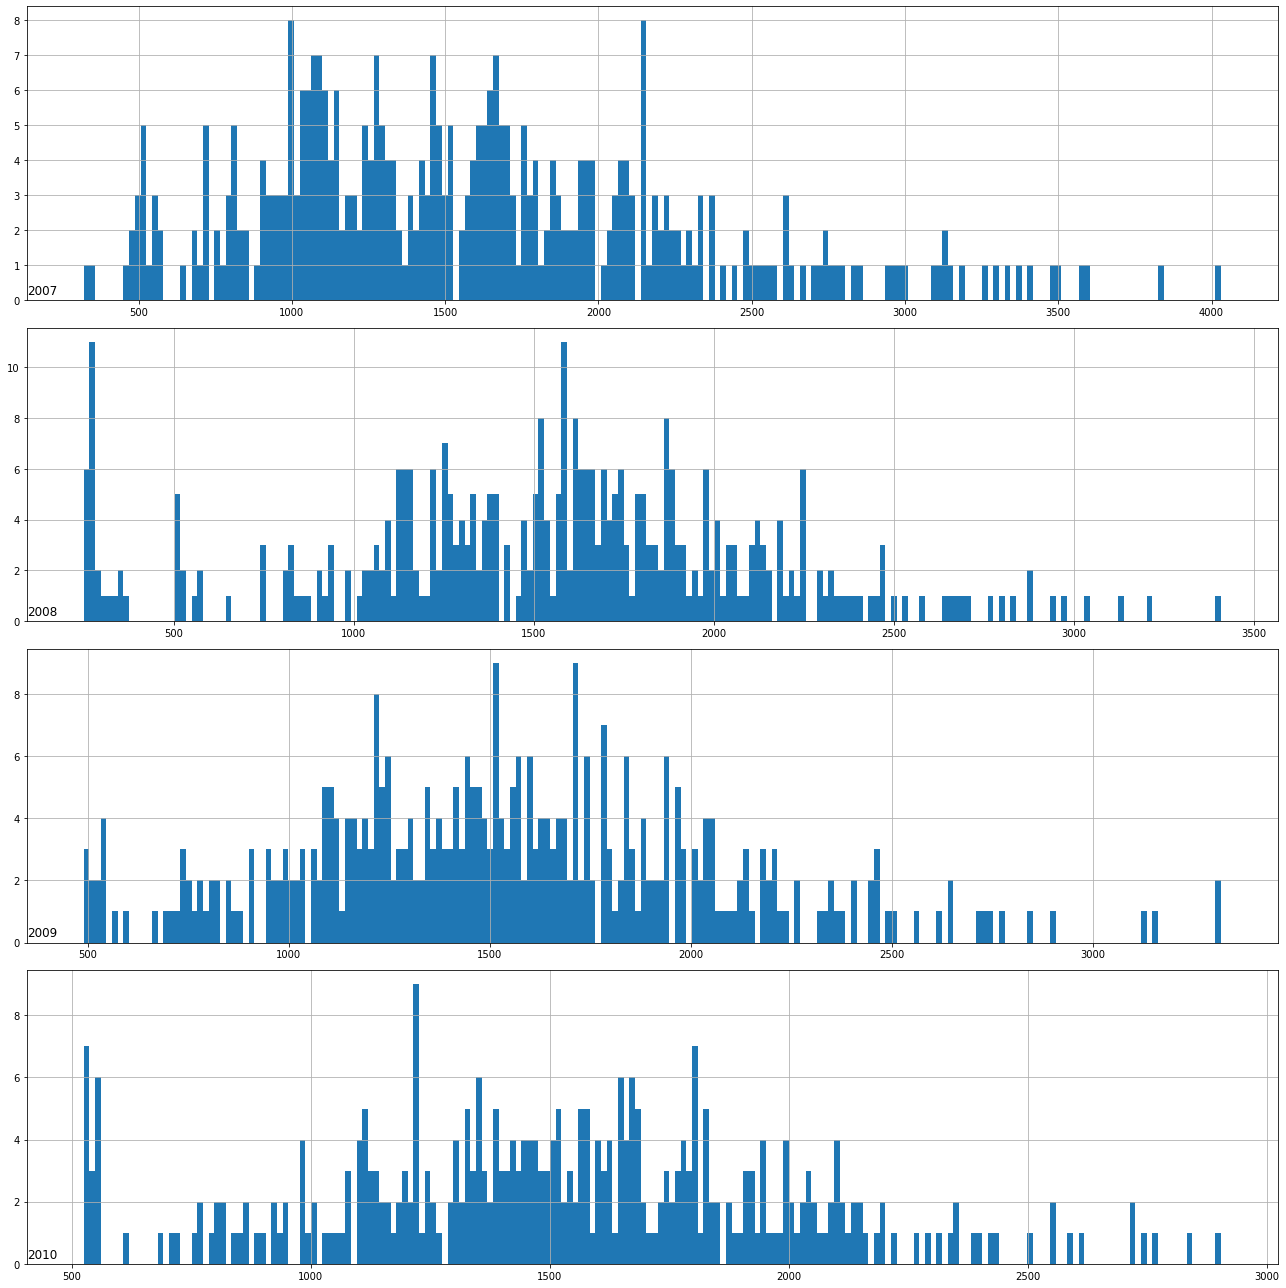

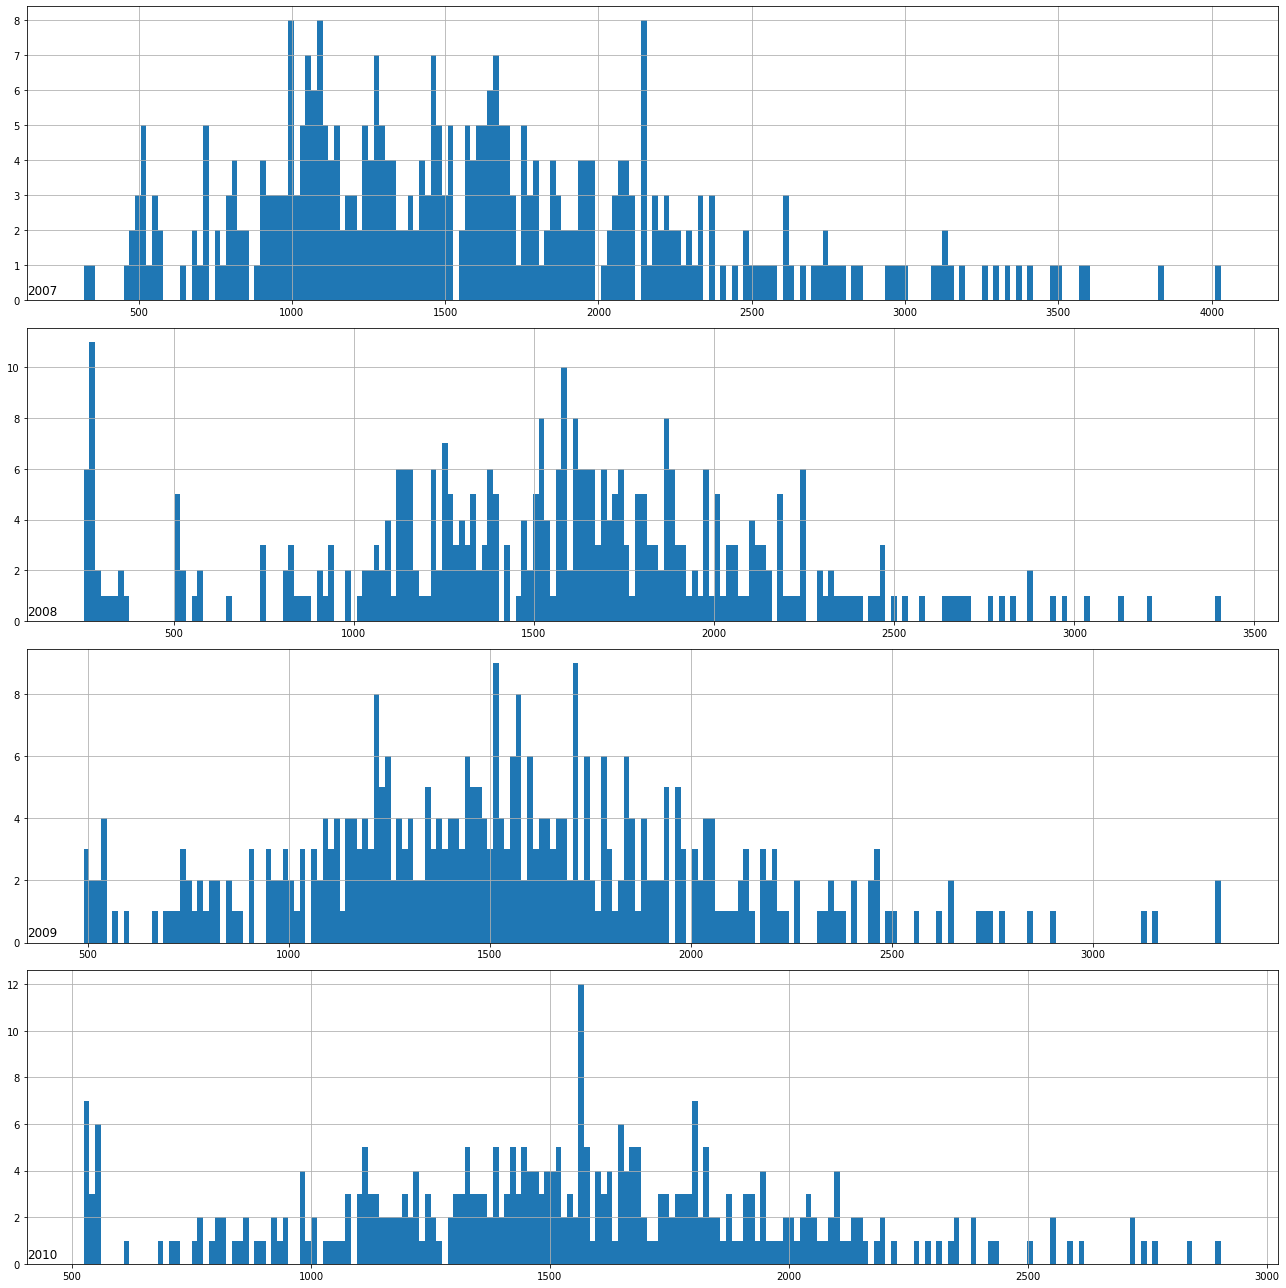

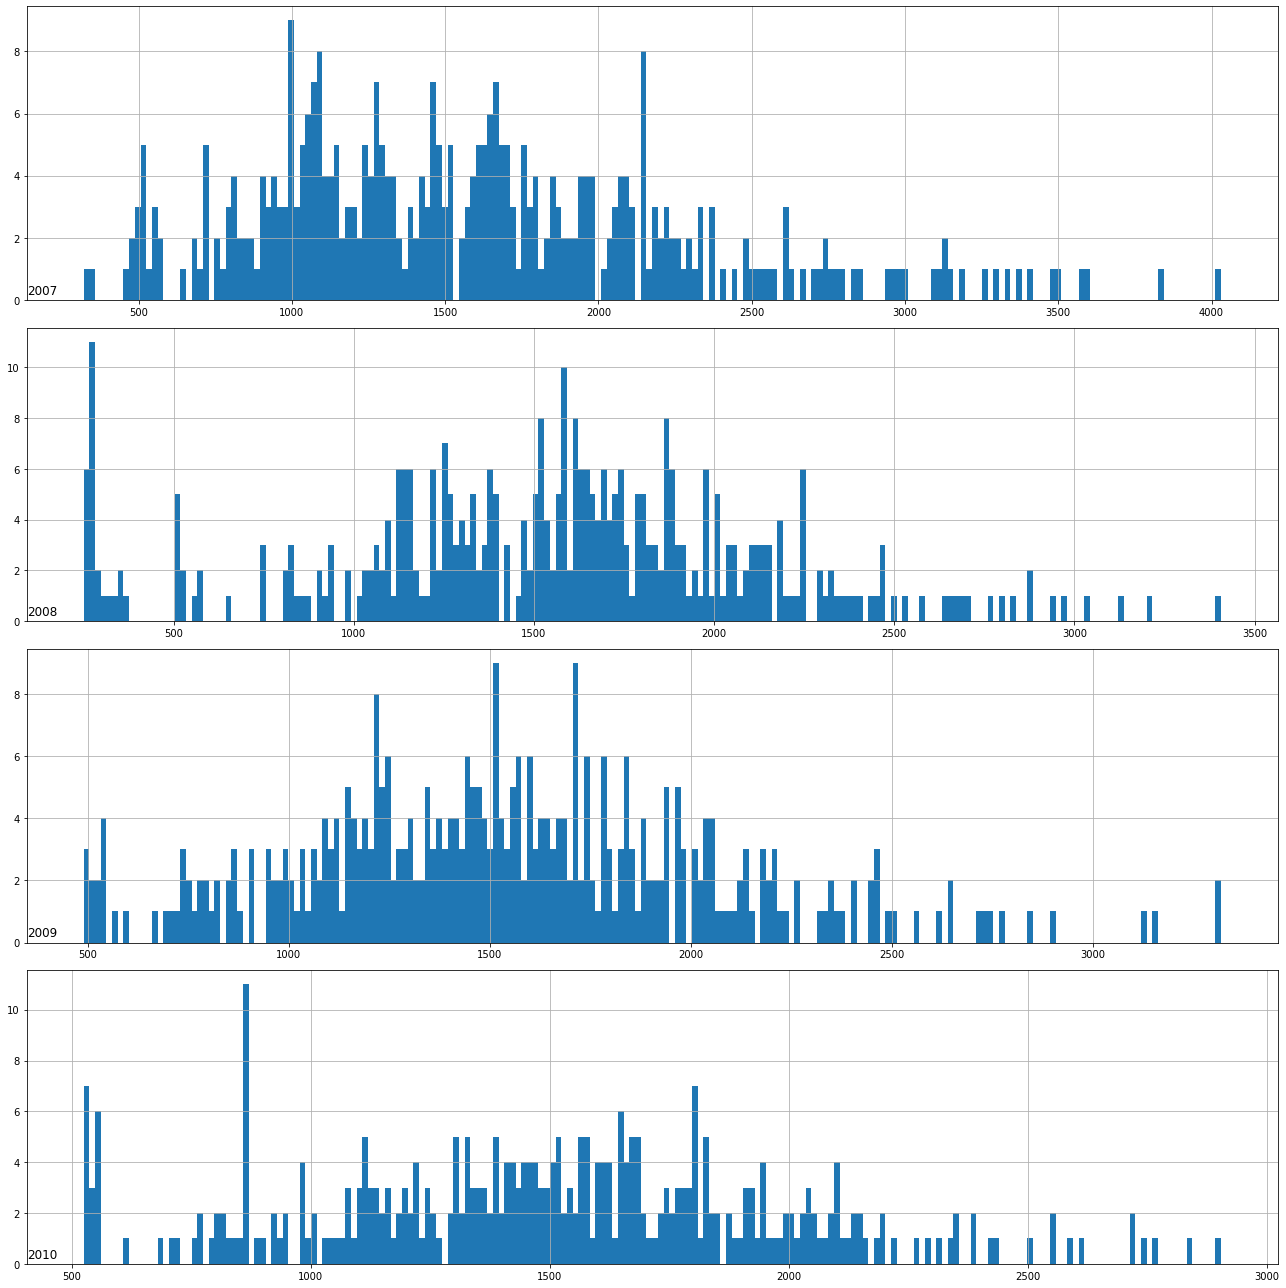

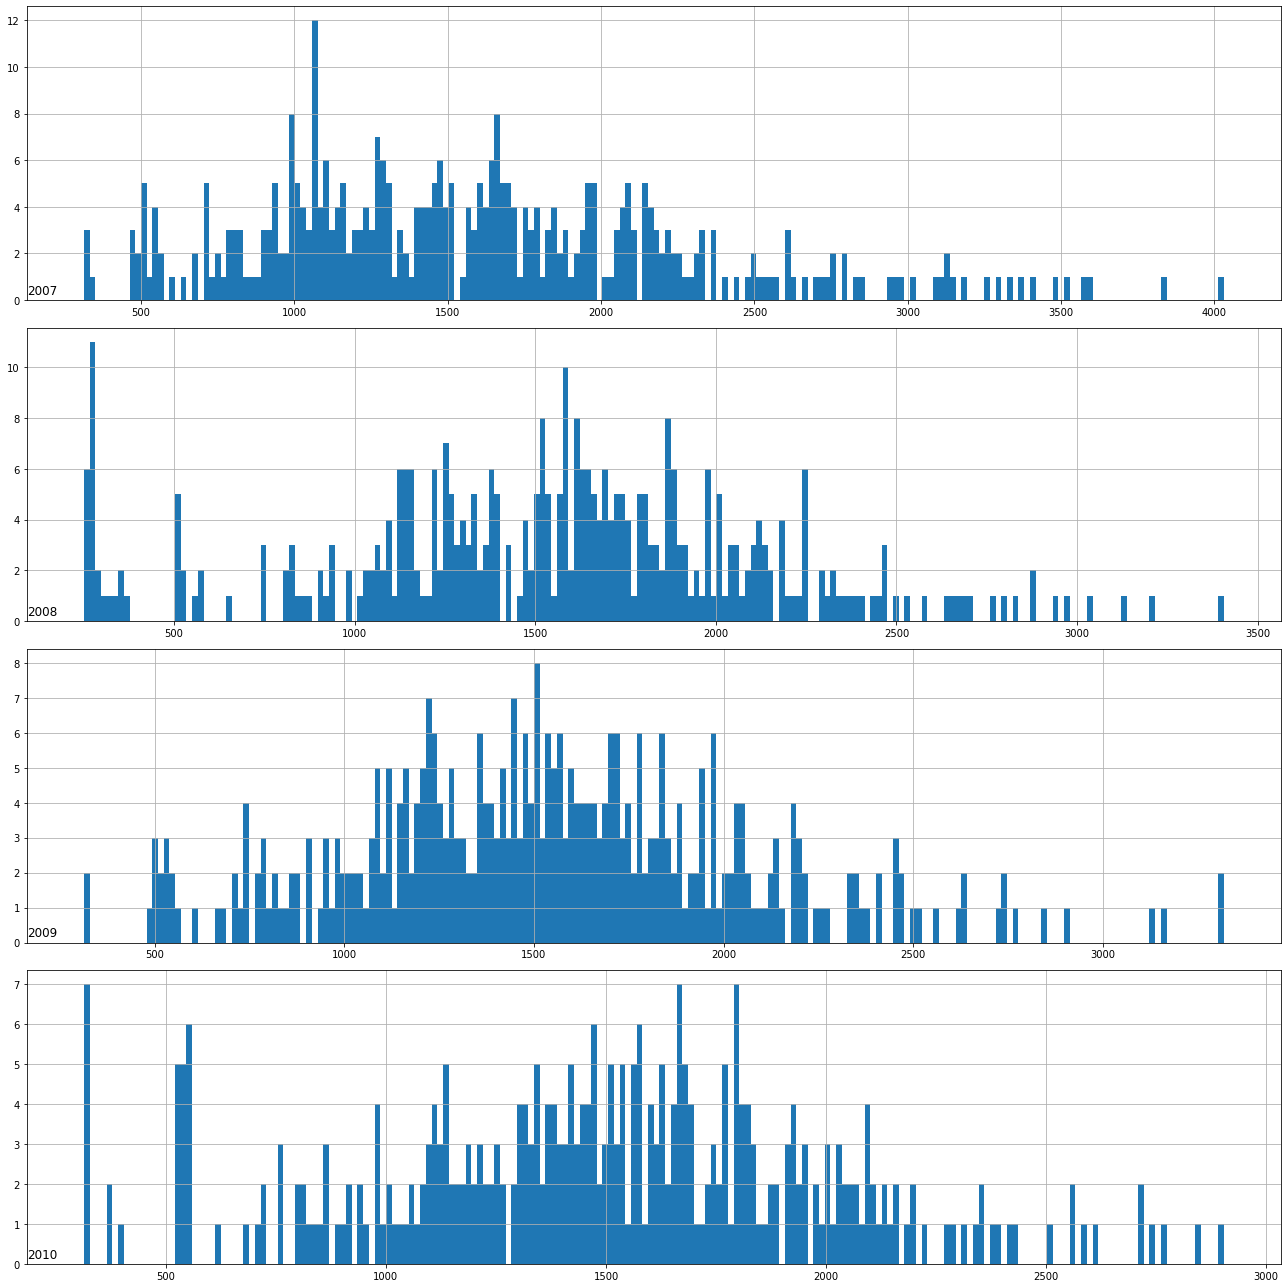

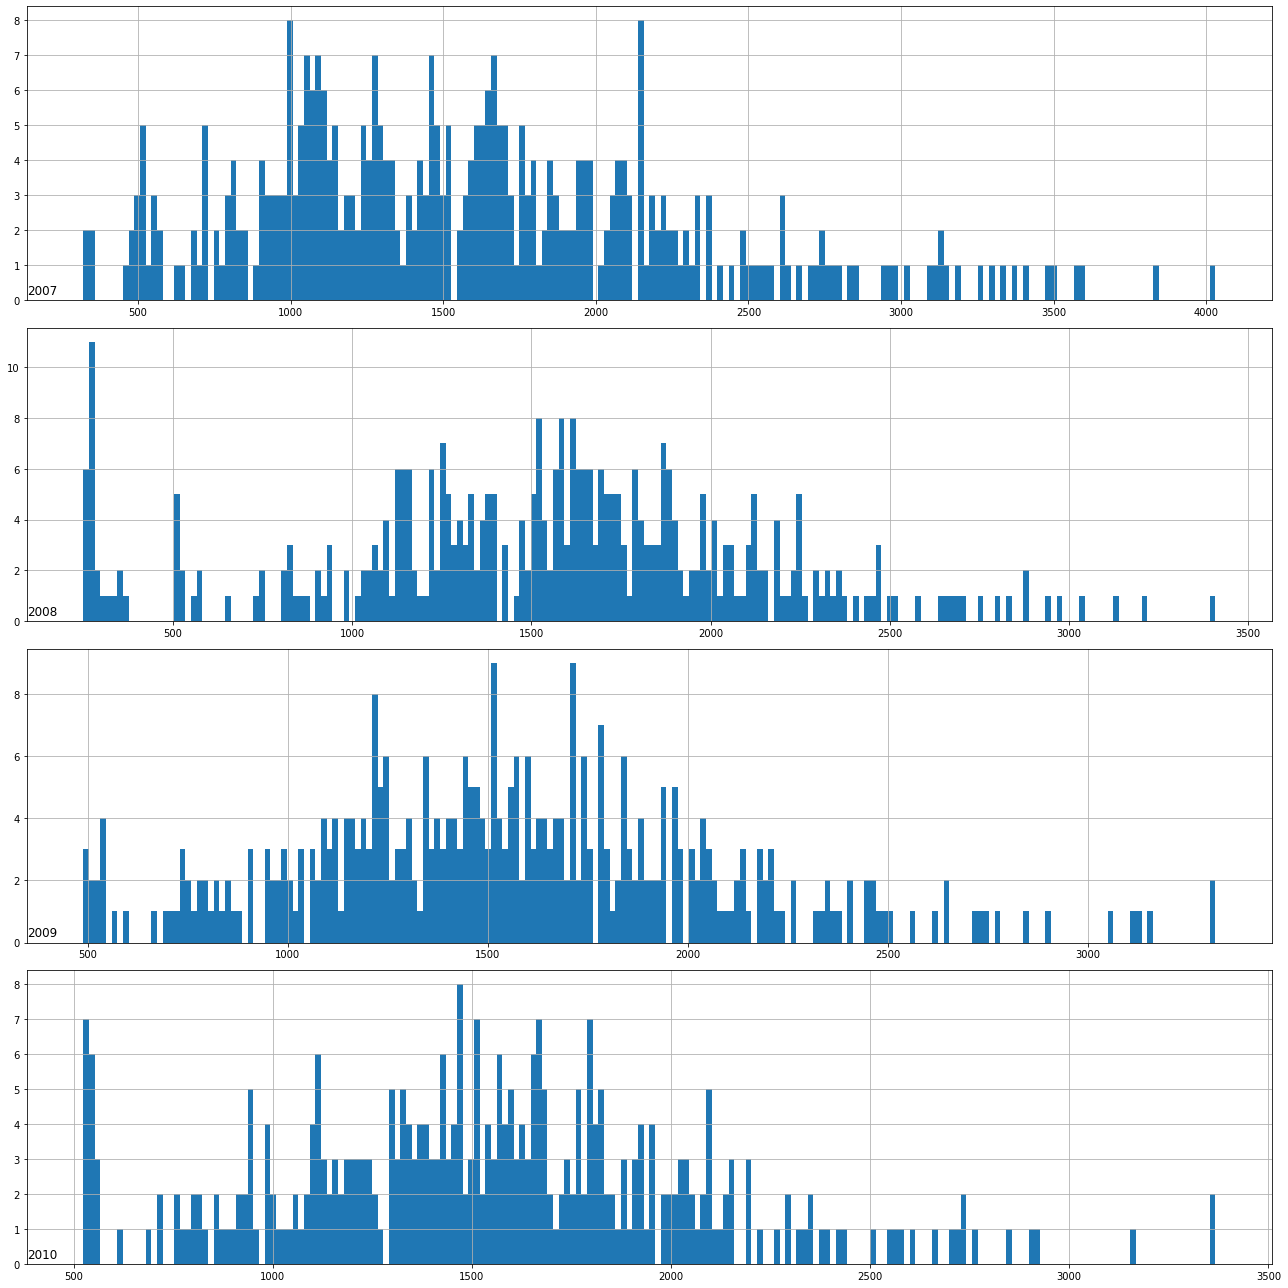

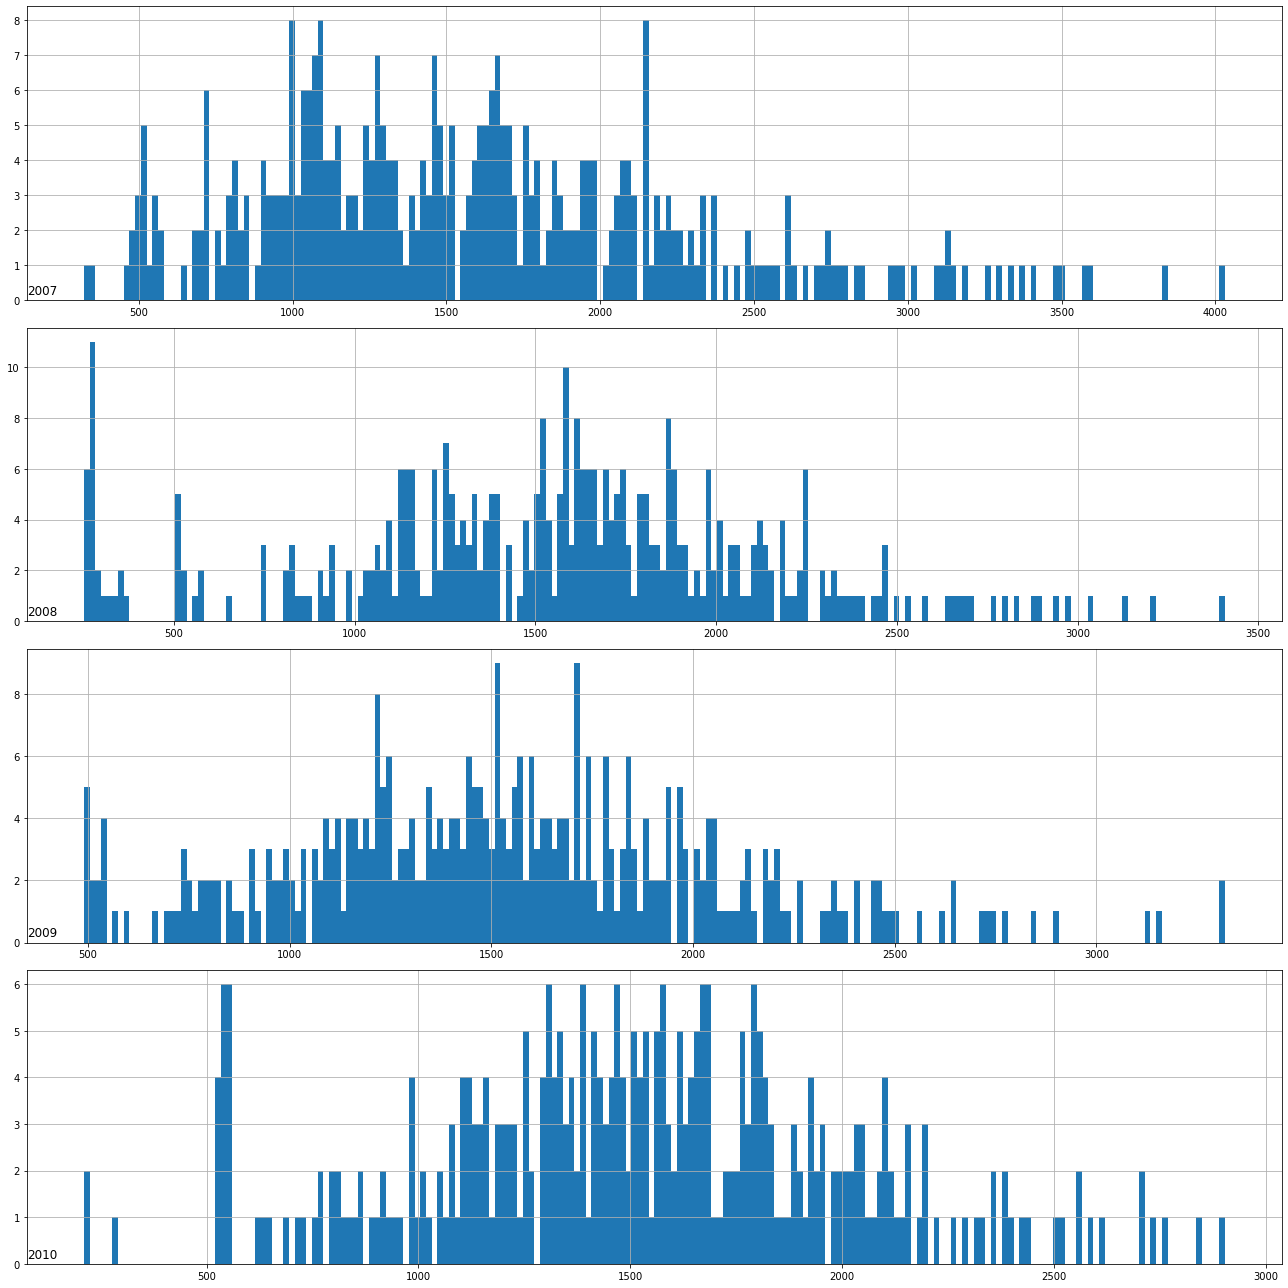

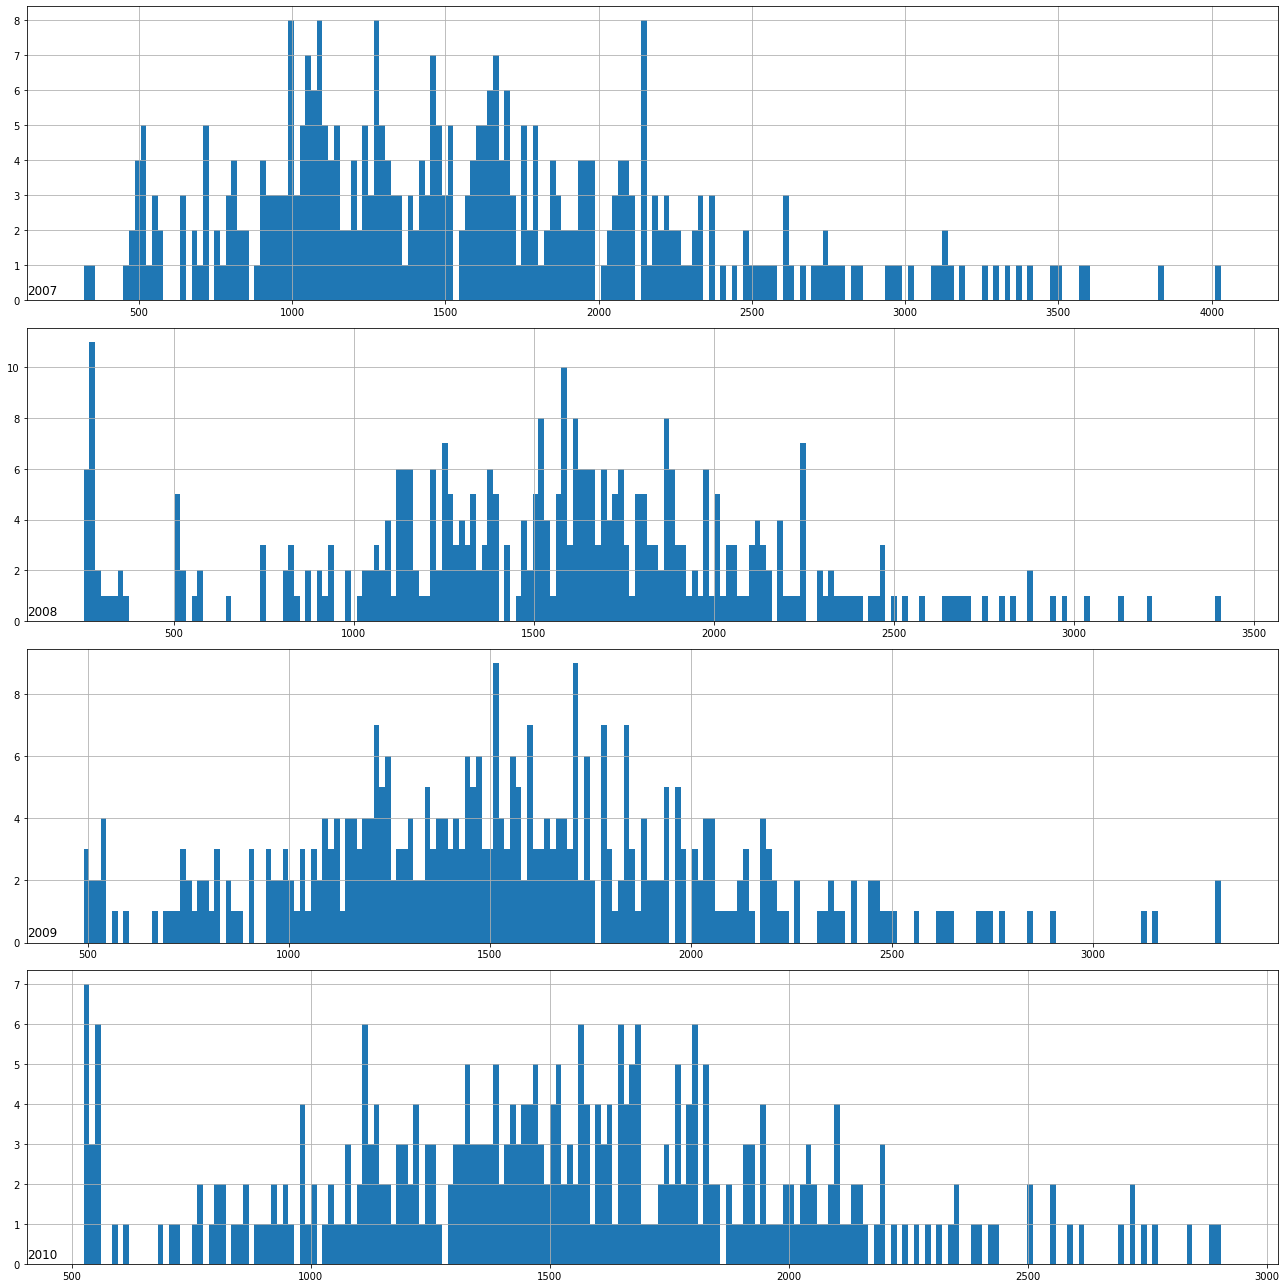

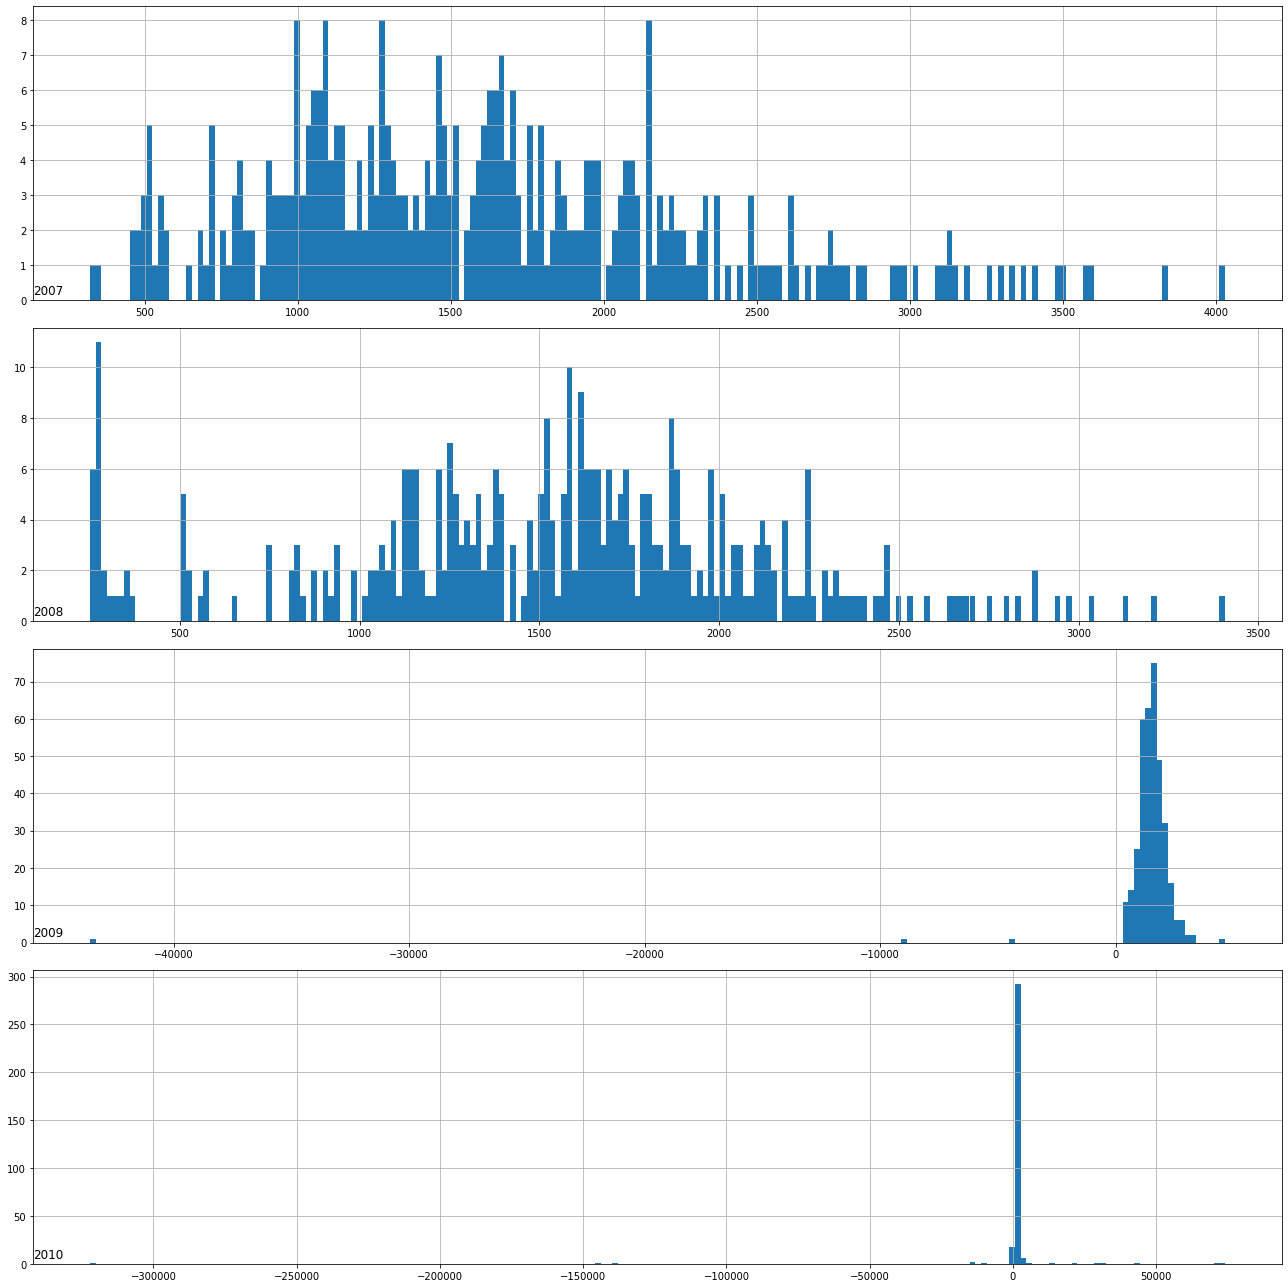

In [43]:
# MAIN FUNCTION  

DATASET_PATH = os.getcwd() + '/dataset/'
cleaned_data = ['custom', 'mean', 'median', 'mode', 'bfill', 'ffill', 'linear', 'polynomial']
years = ['2007', '2008', '2009', '2010']


for i in range(0, len(cleaned_data)):
    cleaned_data[i] = 'power_consumption_' + cleaned_data[i]

for data in cleaned_data:
    df = pd.read_csv(DATASET_PATH + data + '.csv', 
                     parse_dates = True, index_col = 'datetime', low_memory = False)
    
#     correlation
#     visualize_corr(df, 'spearman', data)
    
#     resampling
#     sum karena total konsumsi power
    df_resampled = df.resample('D').sum()
#     resample_over_day(df_resampled, data)
#     visualize_active_power_consumption_each_year(df_resampled, data, years)
    visualize_active_power_consumption_distribution(df_resampled, data, years)